In [1]:
import cv2
from cvzone.HandTrackingModule import HandDetector
from matplotlib import pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import numpy as np

In [2]:
cap = cv2.VideoCapture(1)
cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1280)
cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 720)


detector = HandDetector(maxHands=1, minTrackCon=0.8, detectionCon=0.8)

2025-02-25 18:37:41.670 Python[57885:17769679] WARNING: AVCaptureDeviceTypeExternal is deprecated for Continuity Cameras. Please use AVCaptureDeviceTypeContinuityCamera and add NSCameraUseContinuityCameraDeviceType to your Info.plist.
I0000 00:00:1740505062.855821 17769679 gl_context.cc:369] GL version: 2.1 (2.1 Metal - 89.3), renderer: Apple M1


In [26]:
def is_close(finger_1, finger_2):
    diff = finger_1 - finger_2
    # Compute squared Euclidean distance
    dist_squared = np.sum(diff**2)
    return dist_squared < 150


finger_1 = np.array([1,2,2], dtype=np.float32)
finger_2 = np.array([1.0,2.2,1.9], dtype=np.float32)

is_close(finger_1, finger_2)

True

In [28]:
trajectory = []

while True:
    ret, frame = cap.read()

    hand, frame = detector.findHands(frame)

    if hand:

        middle_finger = np.array(hand[0]["lmList"][12])
        point_finger = np.array(hand[0]["lmList"][8])

        close = is_close(middle_finger, point_finger)

        if close:
            print("Close")

        # print(f" middle: {middle_finger} \n")
        #
        # print(f" point: {point_finger} \n")

        trajectory.append(hand[0]["center"])



    cv2.imshow('frame', frame)
    cv2.waitKey(1)

Close
Close
Close
Close
Close
Close
Close
Close
Close
Close


KeyboardInterrupt: 

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

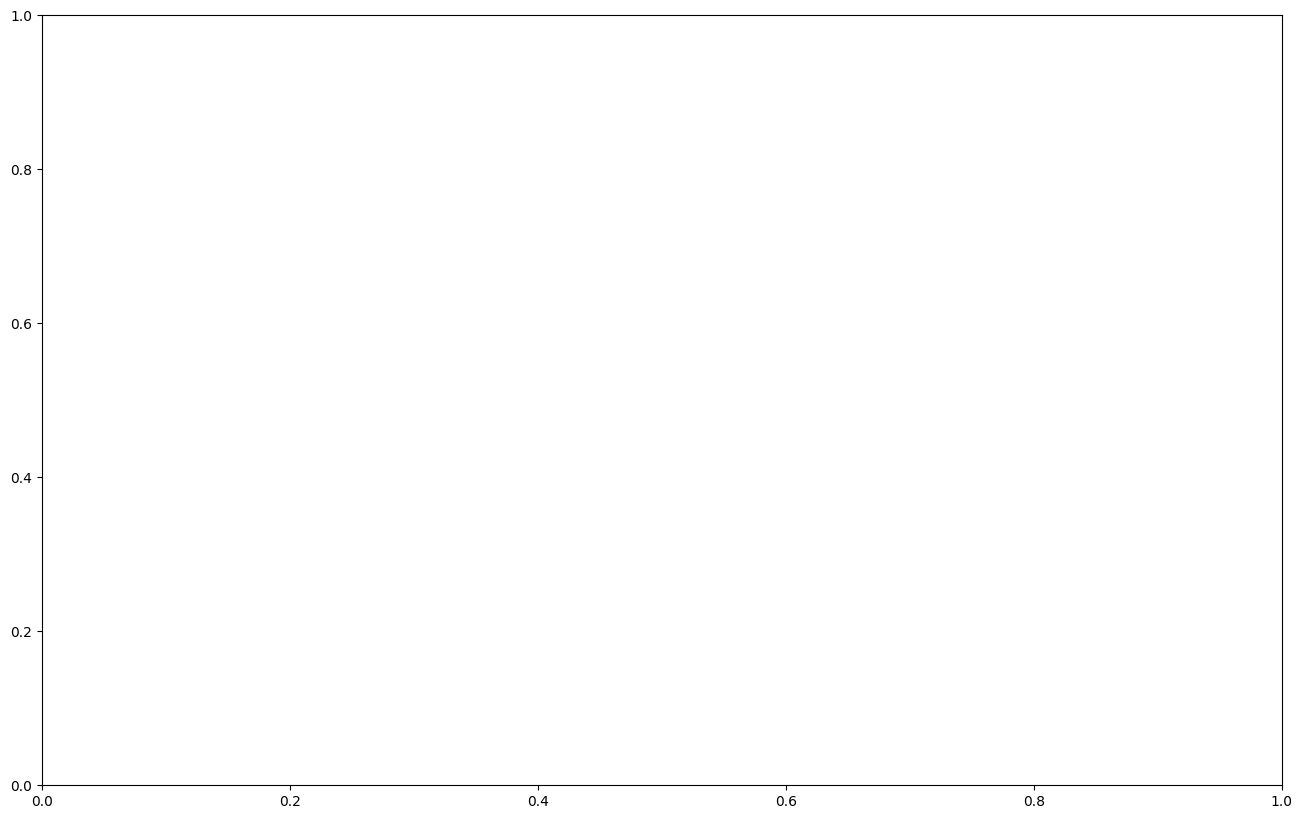

In [10]:
trajectory = np.array(trajectory)

cmap = LinearSegmentedColormap.from_list('yellow_to_purple', ['yellow', 'purple'])

indices = np.arange(len(trajectory))
normalized_indices = indices / (len(trajectory) - 1)

fig, ax = plt.subplots(figsize=(16, 10))

sx = ax.scatter(trajectory[:, 0], trajectory[:, 1], c=normalized_indices, cmap=cmap, s=100)
plt.colorbar(label='Normalized Index')
plt.show()